In [1]:
import pandas as pd
from read_data import read_data
from image import image_process
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from logistic import binary_logistic

In [2]:
X,y = read_data()

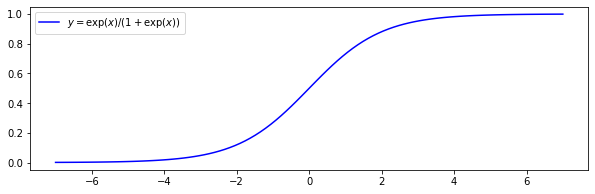

In [3]:
# This function illustrates the idea for logistic regression. To classify binary data,
# we pretend that we are still predicting a continuous label between 0 and 1, and this
# label correspond to the probability of success (= 1). This is like treating the label
# as a Bernoulli(p) random variable with unknown p.
def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

fig, ax = plt.subplots(1,1, figsize = [10,3])
x = np.linspace(-7, 7, 100)
ax.plot(x, sigmoid(x), color='blue', label="$y=\exp(x)/(1+\exp(x))$")
ax.legend()

In [4]:
bl = binary_logistic(X, y)
W, score = bl.train(7, 1)
print(score)

/Users/haoyuli/Desktop/pic_final_project/digit_recognition/logistic.py:33: RuntimeWarning: overflow encountered in exp
  Q = 1 / (1 + np.exp(-X.T @ W1))


0.993188310261481


In [5]:
result_accuracy = bl.compute_all_accuracy()
print(result_accuracy)

[[1.     0.9968 0.9902 0.99   0.9971 0.9778 0.9896 0.9932 0.9891 0.9933]
 [0.9968 1.     0.9922 0.9869 0.9934 0.993  0.9964 0.9917 0.9785 0.9946]
 [0.9902 0.9922 1.     0.9708 0.9846 0.9757 0.9769 0.9839 0.9609 0.9842]
 [0.99   0.9869 0.9708 1.     0.9924 0.9542 0.9898 0.9806 0.9637 0.9827]
 [0.9971 0.9934 0.9846 0.9924 1.     0.9878 0.9864 0.9821 0.988  0.9599]
 [0.9778 0.993  0.9757 0.9542 0.9878 1.     0.9709 0.9882 0.9404 0.9799]
 [0.9896 0.9964 0.9769 0.9898 0.9864 0.9709 1.     0.9955 0.9859 0.9952]
 [0.9932 0.9917 0.9839 0.9806 0.9821 0.9882 0.9955 1.     0.9863 0.9462]
 [0.9891 0.9785 0.9609 0.9637 0.988  0.9404 0.9859 0.9863 1.     0.9678]
 [0.9933 0.9946 0.9842 0.9827 0.9599 0.9799 0.9952 0.9462 0.9678 1.    ]]


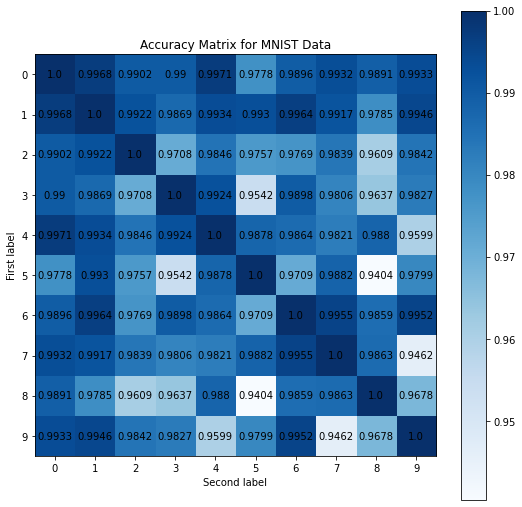

In [6]:
# This few lines visualize the above 2D array. And as the color bar shows, darker color means higher accuracy.
plt.figure(figsize=(9,9))
plt.imshow(result_accuracy, cmap=plt.cm.Blues)
plt.title("Accuracy Matrix for MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('First label')
plt.xlabel('Second label')
plt.colorbar()
width,height = result_accuracy.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(result_accuracy[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

This accuracy matrix can be interpreted as follows: for each (i, j), entry (i, j) represents the accuracy on the test dataset using the binary logistic regression to classify between i and j.